# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read pre-processed data files
train = pd.read_csv("../data/interim/train_processed.csv")
test = pd.read_csv("../data/interim/test_processed.csv")
train.set_index('PassengerId', inplace = True)
test.set_index('PassengerId', inplace = True)

# Explore the data

In [4]:
colList = train.columns
print (colList)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'filledAge', 'Title', 'sex_female',
       'sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')


In [5]:
print ("Total number of passengers is %d"%train.shape[0])
print ("Number of survivors is %d"%train['Survived'].sum())
print ("Number of passengers who perished is %d"
       %(train.shape[0]-train['Survived'].sum()))

Total number of passengers is 891
Number of survivors is 342
Number of passengers who perished is 549


C:\Users\PavanAnirudh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

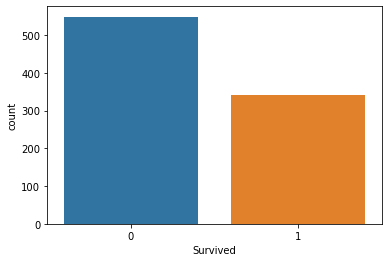

In [6]:
sns.countplot('Survived', data = train)

We can see that the dataset is unbalanced. The accuracy of everone is predicted to have perished is 0.61

Look at the ages and Pclass of survivors

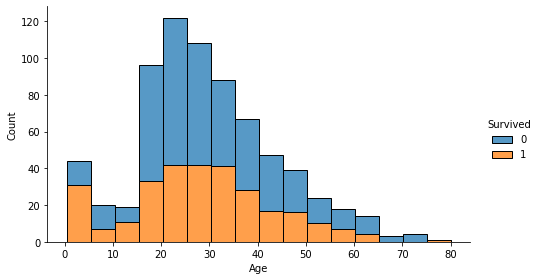

In [7]:
# Look at the distribution of passengers by age
sns.displot(data = train, kind = 'hist', x = 'Age', hue = 'Survived',
            multiple = 'stack',bins=16,height = 4, aspect = 1.7)

We can see that as a percentage, children and elderly have the highest chance of survival. Age groups in 15-40 tend to have the lowest chance of survival

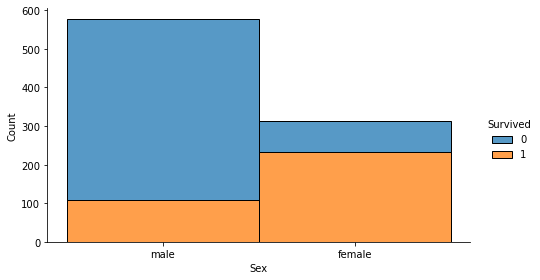

In [8]:
# Look at the distribution of passengers by sex
sns.displot(data = train, kind = 'hist', x = 'Sex', hue = 'Survived',
            multiple = 'stack',bins=2,height = 4, aspect = 1.7)

We can see that females have higher chance of survival compared to males, as expected

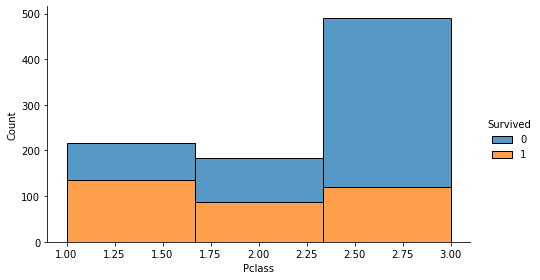

In [9]:
# Lets look at the impact of Pclass
sns.displot(data = train, kind = 'hist', x = 'Pclass', hue = 'Survived',
            multiple = 'stack',bins=3,height = 4, aspect = 1.7)

We can see that the third class passengers are more likely to perish compared to other classes. Majority of passengers in 1st class seem to have survived. 

Did the fare passengers paid tend to affect the survival? This should be correlated to class

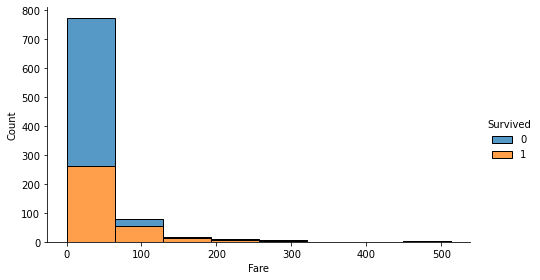

In [10]:
# Lets look at the impact of fare on survival
sns.displot(data = train, kind = 'hist', x = 'Fare', hue = 'Survived',
            multiple = 'stack',bins=8,height = 4, aspect = 1.7)

As expected, higher the fare,better the chance of survival

We should also see whether having siblings or children gives a higher chance of survival


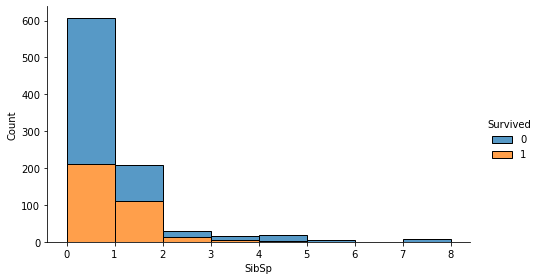

In [11]:
# Lets look at the impact of siblings on the ship
sns.displot(data = train, kind = 'hist', x = 'SibSp', hue = 'Survived',
            multiple = 'stack',bins=8,height = 4, aspect = 1.7)

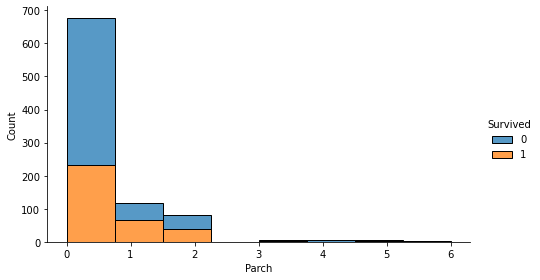

In [12]:
# Lets look at the impact of parch on the ship
sns.displot(data = train, kind = 'hist', x = 'Parch', hue = 'Survived',
            multiple = 'stack',bins=8,height = 4, aspect = 1.7)

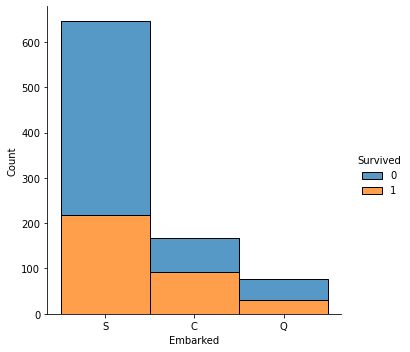

In [13]:
# Does it matter where someone embarked?
sns.displot(data = train, kind = 'hist', x ='Embarked', hue ='Survived',bins = 3, multiple = 'stack') 

We do not see an obvious dependence. However, more passengers frm S perished, likely due to more number of passengers who embarked there

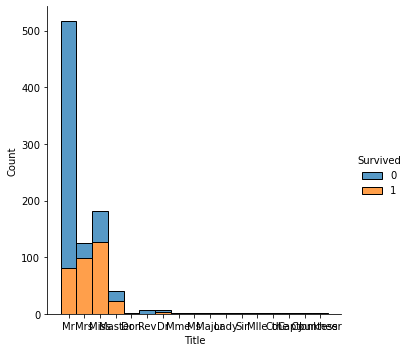

In [15]:
# Lets look at the impact of title on survival
sns.displot(data = train, kind = 'hist', x ='Title', 
            hue ='Survived',bins = 3, multiple = 'stack') 

Based on these observations, we can go ahead and try to predict whether a passenger survived or perished based on his information